<a href="https://colab.research.google.com/github/ashinikudavidanage/CineDoc/blob/Santheep/Cinadoc_ML_Model_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown 1DyzESaLXGz4qQASslNJxuPXjRhw7LviG

Downloading...
From: https://drive.google.com/uc?id=1DyzESaLXGz4qQASslNJxuPXjRhw7LviG
To: /content/Dataset_02.zip
100% 888M/888M [00:24<00:00, 36.9MB/s]


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip Dataset_02.zip

Archive:  Dataset_02.zip
   creating: Testing/Roughbark/
  inflating: Testing/Roughbark/IMG_4870.JPG  
  inflating: Testing/Roughbark/IMG_4874.JPG  
  inflating: Testing/Roughbark/IMG_4893.JPG  
  inflating: Testing/Roughbark/IMG_E4781.JPG  
  inflating: Testing/Roughbark/IMG_E4783.JPG  
  inflating: Testing/Roughbark/IMG_E4785.JPG  
  inflating: Testing/Roughbark/IMG_E4787.JPG  
  inflating: Testing/Roughbark/IMG_E4789.JPG  
  inflating: Testing/Roughbark/IMG_E4791.JPG  
  inflating: Testing/Roughbark/IMG_E4793.JPG  
  inflating: Testing/Roughbark/IMG_E4795.JPG  
  inflating: Testing/Roughbark/IMG_E4797.JPG  
  inflating: Testing/Roughbark/IMG_E4804.JPG  
  inflating: Testing/Roughbark/IMG_E4806.JPG  
  inflating: Testing/Roughbark/IMG_E4808.JPG  
  inflating: Testing/Roughbark/IMG_E4810.JPG  
  inflating: Testing/Roughbark/IMG_E4812.JPG  
  inflating: Testing/Roughbark/IMG_E4814.JPG  
  inflating: Testing/Roughbark/IMG_E4827.JPG  
  inflating: Testing/Roughbark/IMG_E4829.JPG  
  infl

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import keras

from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [ ]:
os.listdir("/content/Training")

['Stripecanker', 'Roughbark']

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, rescale= 1/255, horizontal_flip = True, preprocessing_function= preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory="/content/Training", target_size =(255,255), batch_size = 2)

val = val_datagen.flow_from_directory(directory="/content/validation", target_size =(255,255), batch_size = 2)

Found 205 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [ ]:
t_img, label = train.next()

In [ ]:
t_img.shape

(32, 255, 255, 3)

In [ ]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize = (5,5))
    plt.imshow(im)
    plt.show()

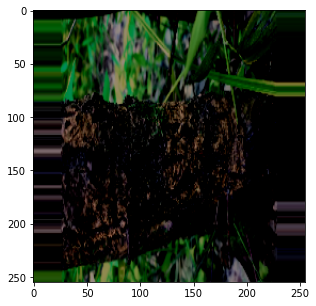

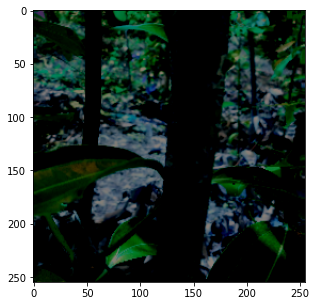

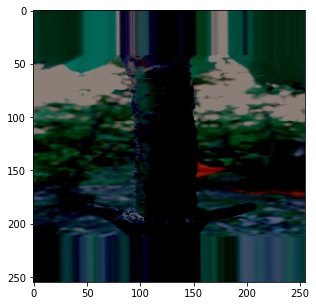

In [ ]:
plotImage(t_img[:3], label[:3])

Model building

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
import keras

In [ ]:
base_model = VGG16(input_shape=(255,255,3), include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0     

In [ ]:
x = Flatten()(base_model.output)

x = Dense(units= 2, activation='softmax')(x)

#Creating model
model = Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'] )

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1 )

mc = ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy', min_delta=0.01, patience=3, verboss=1, save_best_only=True)

cb = [es,mc]

In [ ]:
his = model.fit_generator(train, steps_per_epoch=16, epochs = 50, verbose=1, callbacks=cb, validation_data=val, validation_steps=5  )

<ipython-input-39-61aaf9155f1c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train, steps_per_epoch=16, epochs = 50, verbose=1, callbacks=cb, validation_data=val, validation_steps=5  )


Epoch 1/50
16/16 [==============================] - 7s 374ms/step - loss: 0.5132 - accuracy: 0.9062 - val_loss: 62.2943 - val_accuracy: 0.3000
Epoch 2/50
16/16 [==============================] - 7s 419ms/step - loss: 0.5571 - accuracy: 0.8750 - val_loss: 59.0381 - val_accuracy: 0.3000
Epoch 3/50
16/16 [==============================] - 7s 422ms/step - loss: 0.2192 - accuracy: 0.9062 - val_loss: 57.9607 - val_accuracy: 0.5000
Epoch 4/50
16/16 [==============================] - 7s 443ms/step - loss: 0.6451 - accuracy: 0.8750 - val_loss: 29.5866 - val_accuracy: 0.6000
Epoch 5/50
16/16 [==============================] - 6s 364ms/step - loss: 0.4372 - accuracy: 0.8750 - val_loss: 29.4012 - val_accuracy: 0.7000
Epoch 6/50
16/16 [==============================] - 6s 351ms/step - loss: 0.7253 - accuracy: 0.8438 - val_loss: 9.3830 - val_accuracy: 0.8000
Epoch 7/50
16/16 [==============================] - 7s 461ms/step - loss: 0.8236 - accuracy: 0.8438 - val_loss: 13.0357 - val_accuracy: 0.8000


In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

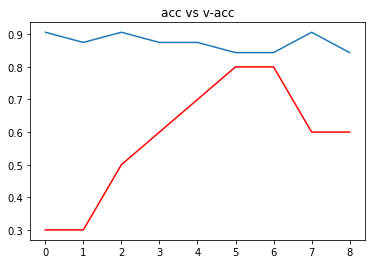

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

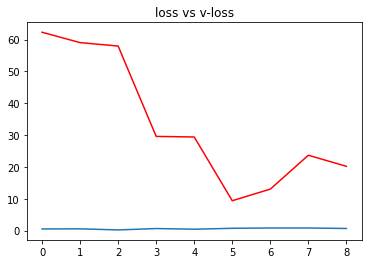

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate_generator(val)[1]

print(f"Accuracy of model: {acc*100} %")

<ipython-input-45-cafcd0d51148>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


Accuracy of model: 61.538463830947876 %


In [50]:
def prediction(path):
  img = load_img(path, target_size=(255,255))

  i = img_to_array(img)
  im = preprocess_input(i)

  img = np.expand_dims(im, axis=0)

  pred = np.argmax(model.predict(img))

  print(pred)
  

In [54]:
train.class_indices

{'Roughbark': 0, 'Stripecanker': 1}

In [53]:
path_1 = "/content/Testing/Roughbark/IMG_E4789.JPG"
path_2 = "/content/Testing/Stripecanker/IMG_1775.JPG"

prediction(path_1)

prediction(path_2)

1/1 [==============================] - 0s 20ms/step
0
1/1 [==============================] - 0s 23ms/step
1
